# Introduction:
In online retail (e-commerce) understanding customer churn has become essential for businesses striving to enhance customer retention and satisfaction. Customer churn refers to the rate at which customers cease their relationship with a company or stop using their service  often switching to a competitor or discontinuing their purchases altogether. Analysis of customer churn can reveal critical insights that enable businesses to create targeted strategies ultimately reducing churn and fostering long-term customer loyalty.





# Objectives:
Identifying key factors influencing customer churn to facilitate targeted retention strategies.
Understanding customer behavior patterns associated with churn thereby enabling the development of approaches to enhance customer satisfaction and engagement.

# Dataset:
we will be examining an e-commerce dataset to analyze customer churn. To initiate our data analysis, we will begin by importing all essential libraries. Following that we will load the data into a DataFrame which we will refer to as ‘EC’.



In [65]:
import pandas as pd
import sklearn
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as ex
import seaborn as sns
from scipy.stats import chi2
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [66]:
EC= pd.read_csv("BA - Assignment Part 1 data set.xlsx - E Comm.csv")

In [67]:
EC

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [68]:
EC.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


As shown from the records above dataset includes a range of features from customer demographics to their purchasing behaviors. Key attributes include:

* Customer Demographics: Gender, City Tier, Marital Status.
* Shopping Preferences: Preferred Login Device, Preferred Payment Mode, Preferred Order Categories.
* Engagement Metrics: Hours Spent on App, Number of Devices Registered, Satisfaction Score.
* Transactional Behavior: Order Amount Hike from Last Year, Number of Addresses, Frequency of Coupon Usage

In [69]:
EC.duplicated().sum()

0

In [70]:
for i in EC.columns:
    if EC[i].isnull().sum()>0:
        print(i)
        print(f'The total null value in {i} is',EC[i].isnull().sum())
        print('The data type', EC[i].dtypes)
        print()

Tenure
The total null value in Tenure is 264
The data type float64

WarehouseToHome
The total null value in WarehouseToHome is 251
The data type float64

HourSpendOnApp
The total null value in HourSpendOnApp is 255
The data type float64

OrderAmountHikeFromlastYear
The total null value in OrderAmountHikeFromlastYear is 265
The data type float64

CouponUsed
The total null value in CouponUsed is 256
The data type float64

OrderCount
The total null value in OrderCount is 258
The data type float64

DaySinceLastOrder
The total null value in DaySinceLastOrder is 307
The data type float64



We can observe Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount and DaySinceLastOrder has null values, so we will be replacing thos with median.

In [71]:
# for column in EC.columns:
#     if EC[column].isnull().sum()>0:
#         EC[column].fillna(EC[column].median(),inplace=True)

In [72]:
EC.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [73]:
EC.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [74]:
for column in EC.columns:
    if EC[column].dtype=='object':
        print( EC[column].value_counts())
        print()
        print()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Male      3384
Female    2246
Name: Gender, dtype: int64


Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




Replacing duplicate values in columns PreferredLoginDevice(Phone and Mobile Phone are same), PreferredPaymentMode(COD, CC is same as Cash On Delivery and Credit Card), PreferedOrderCat(Mobile Phone and Mobile are same)

Let’s initiate the data analysis to examine how various columns influence churn in our e-commerce dataset.

In [75]:
EC['PreferredLoginDevice']= EC['PreferredLoginDevice'].replace("Phone","Mobile Phone")
EC['PreferredPaymentMode']=EC['PreferredPaymentMode'].replace(["CC","COD"],["Credit Card","Cash on Delivery"])
EC['PreferedOrderCat']=EC['PreferedOrderCat'].replace("Mobile","Mobile Phone") 

 # How does customer tenure influence their likelihood of churn?

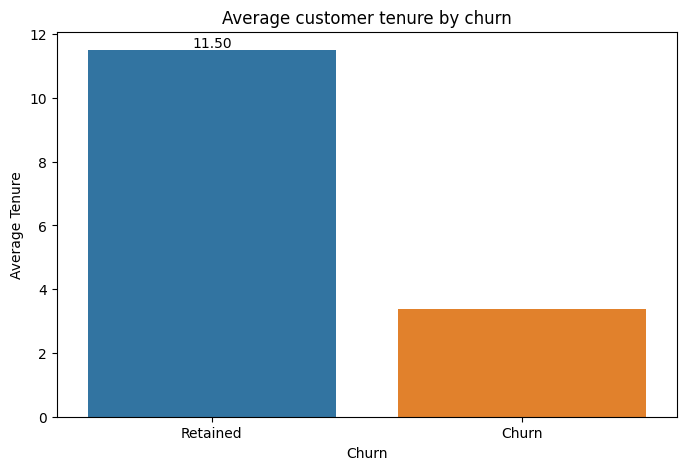

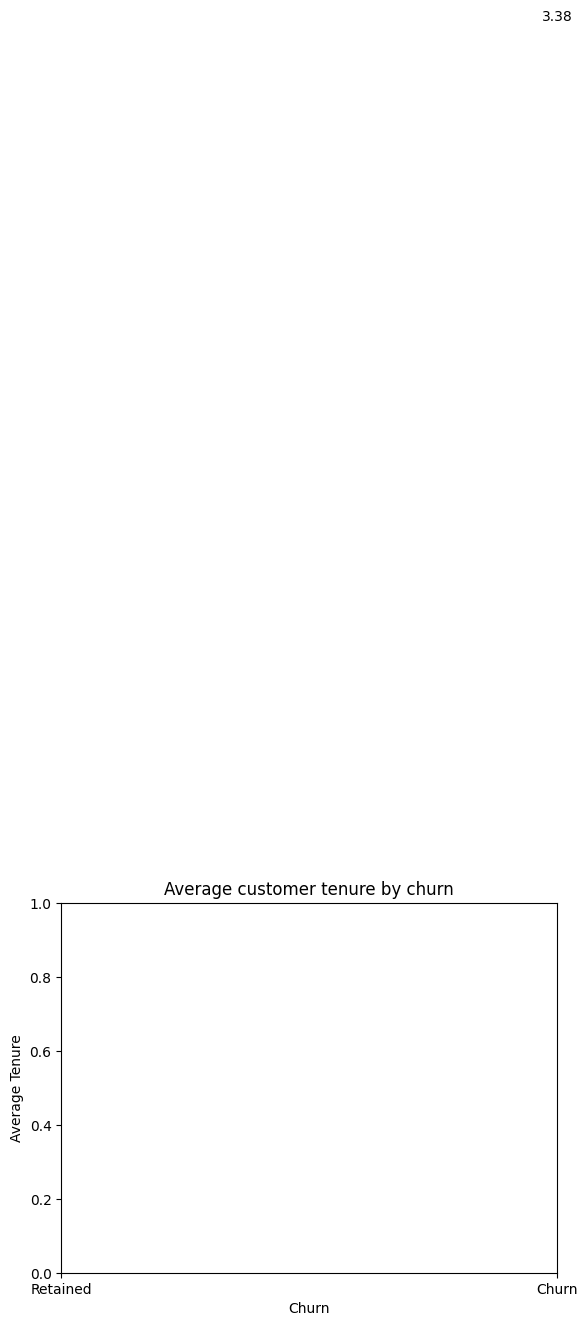

In [76]:
avg_tenure=EC.groupby('Churn')['Tenure'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_tenure.index,y=avg_tenure.values)
# adding the text on the bar
for index, value in enumerate(avg_tenure):
    plt.text(index,value, f'{value:.2f}', ha='center', va='bottom')
    plt.title('Average customer tenure by churn')
    plt.xlabel('Churn')
    plt.ylabel('Average Tenure')
    plt.xticks([0,1],['Retained','Churn'])
    plt.show()

The analysis of customer tenure in relation to churn reveals.

* Customers who were retained (Churn = 0) have an average tenure of approximately 11.40.
* customers who churned (Churn = 1) have a significantly lower average tenure of around 3.86.

The bar chart visually illustrates this difference, clearly showing that customers who stay with the service tend to have a longer tenure, while those who leave (churn) typically do so after a shorter duration.

* This indicates a strong relationship between tenure and churn, suggesting that customers who engage with the service for a longer period are less likely to churn. This insight can be crucial for developing strategies to enhance customer retention, such as focusing on early engagement and retention efforts for newer customers.

# Is there a relationship between the Preferd Login Device and Churn Rate?

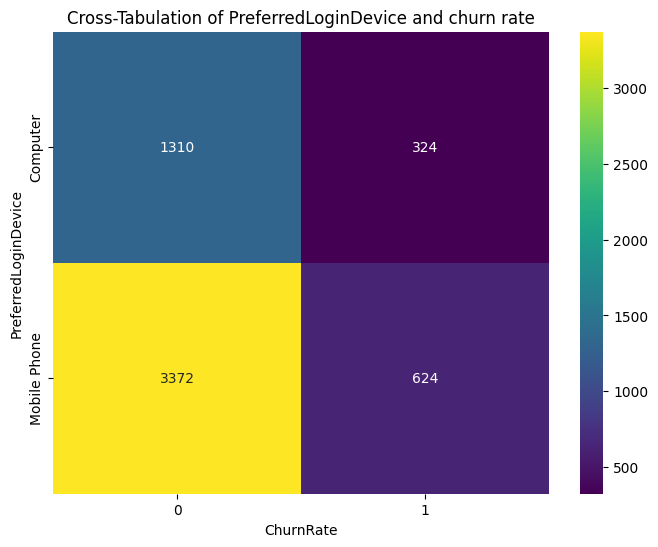

In [77]:
# Cross tabulation

cross_tab = pd.crosstab(EC['PreferredLoginDevice'],EC['Churn'])
#chi-Square test of independence to see if there is a significant relationship
from scipy.stats import chi2_contingency
chi2,p,dof,expected= chi2_contingency(cross_tab)
# visualizing the cross-tabulation
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab,annot=True,fmt='d',cmap='viridis')
plt.title('Cross-Tabulation of PreferredLoginDevice and churn rate')
plt.xlabel('ChurnRate')
plt.ylabel('PreferredLoginDevice')
plt.show()

In [78]:
# calculation the percentage of churn and not churn rate for each Login Device
# First create the cross tabluation with normalization
device_churn_percentage= pd.crosstab(EC['PreferredLoginDevice'], EC['Churn'], normalize='index') * 100
# Convert percentages for easier interpretation
device_churn_percentage=device_churn_percentage.round(2)
device_churn_percentage

Churn,0,1
PreferredLoginDevice,,
Computer,80.17,19.83
Mobile Phone,84.38,15.62


these percenatges suggest that:
* Customers who prefer using a computer for login have a slightly heigher churn rate (19.83%) compared to those who prefer mobile phones (15.62)
* Mobile user have a higher retention rate.

This analysis reveals that there is indeed a relationship between the preferred login device and churn rate, with the type of device potentially influencing the likelihood of a customer churning.

# How does the city tier affect the likelihood of churn?


In [79]:
# calculate the percentage of churn and not churn fore each city tier
city_tier_churn_percentage=pd.crosstab(EC['CityTier'],EC['Churn'],normalize='index') *100
#convert percentages for easier interpretation
city_tier_churn_percentage=city_tier_churn_percentage.round(2)
city_tier_churn_percentage

Churn,0,1
CityTier,,
1,85.49,14.51
2,80.17,19.83
3,78.63,21.37


These percentagew indicate that the likelihood of churn varies with the city tier:

* customers in city tier 1 have the heighest retention rate and the lowest churn rate.
* As the city tier increases to 2 and 3 the churn rate rises and the retention rate decreases.


# Does the preferred payment mode have any correlation with customer churn?

<Figure size 1600x1000 with 0 Axes>

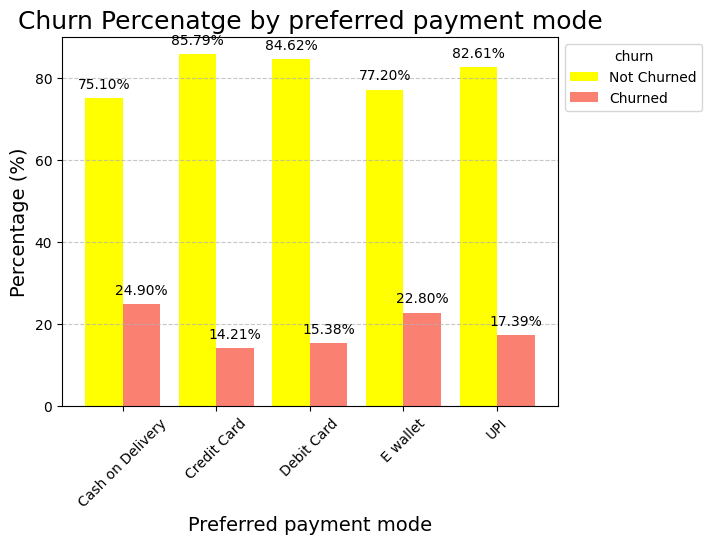

In [80]:
payment_mode_churn_percentage= pd.crosstab(EC['PreferredPaymentMode'],EC['Churn'],normalize='index')*100
payment_mode_churn_percentage=payment_mode_churn_percentage.round(2)

plt.figure(figsize=(16,10))
ax=payment_mode_churn_percentage.plot(kind='bar',color=['yellow','salmon'],width=0.8)
# Adding percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',(p.get_x() + p.get_width()/2.,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points')
    
plt.title ('Churn Percenatge by preferred payment mode',size=18)
plt.xlabel('Preferred payment mode',size=14)
plt.ylabel('Percentage (%)',size=14)
plt.xticks (rotation=45)
plt.legend(title='churn',labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1),fontsize='medium')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

* Cash on Delivery users have the highest churn rate (24.90%), followed by E wallet users (22.80%), and UPI users (17.39%).
* Credit Card and Debit Card users exhibit lower churn rates, at 14.21% and 15.38%, respectively.

# Is there a gender disparity in the churn rates?


<Figure size 2000x1600 with 0 Axes>

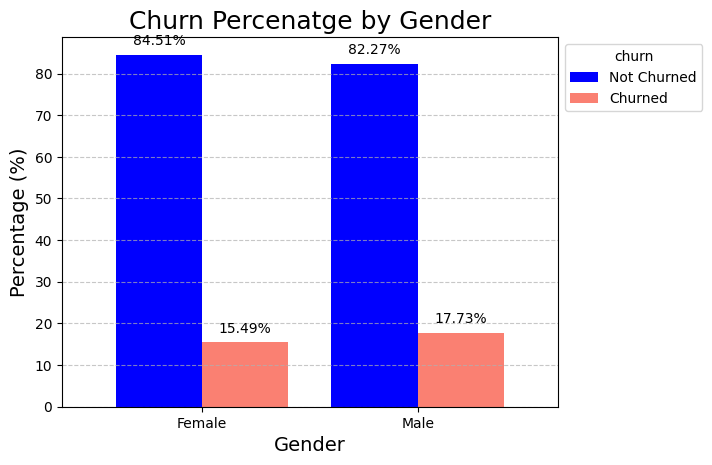

In [81]:
gender_churn_percentage= pd.crosstab(EC['Gender'],EC['Churn'],normalize='index')*100
gender_churn_percentage=gender_churn_percentage.round(2)

plt.figure(figsize=(20,16))
ax=gender_churn_percentage.plot(kind='bar',color=['blue','salmon'],width=0.8)
# Adding percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',(p.get_x() + p.get_width()/2.,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points')
    
plt.title ('Churn Percenatge by Gender',size=18)
plt.xlabel('Gender',size=14)
plt.ylabel('Percentage (%)',size=14)
plt.xticks (rotation=0)
plt.legend(title='churn',labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1),fontsize='medium')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

These percentages indicate that there are indeed gender-based patterns in customer churn:

* Male customers have a slightly higher churn rate (17.73%) compared to female customers (15.49%).
* Female customers exhibit a higher retention rate (84.51%) than male customers (82.27%).

This suggests that gender may play a role in customer churn, with different churn rates observed between male and female customers. This insight can be important for developing gender-specific customer engagement and retention strategies.

# How does the number of hours spent on the app influence the churn rate?


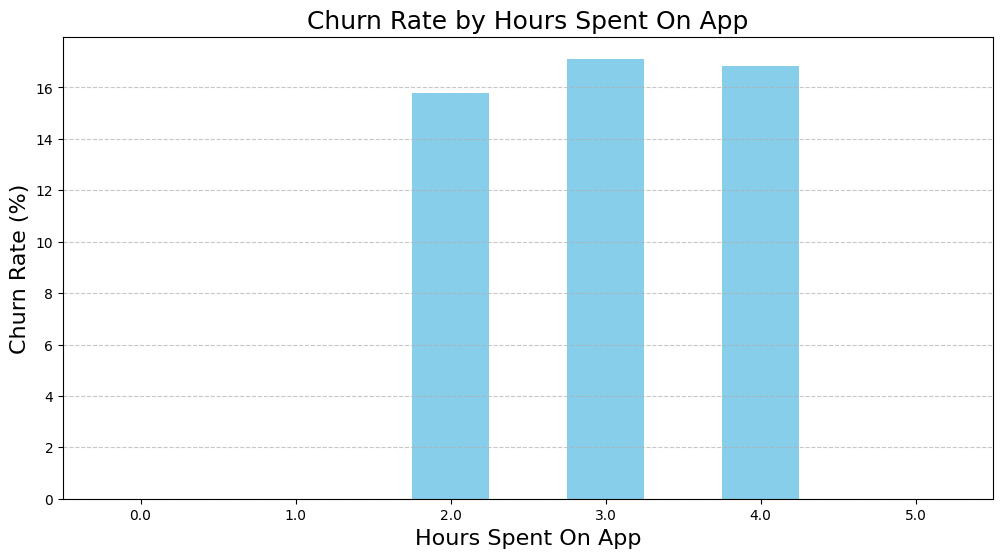

In [82]:
hours_churn_rate= EC.groupby('HourSpendOnApp')['Churn'].mean()*100

# creating a plot to visualize the relationship
plt.figure(figsize=(12,6))
hours_churn_rate.plot(kind='bar',color='skyblue')
plt.title('Churn Rate by Hours Spent On App', size=18)
plt.xlabel('Hours Spent On App',size=16)
plt.ylabel('Churn Rate (%)',size=16)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

*  0, 1, and 5 Hours: There is a 0% churn rate for customers who spend 0, 1, and 5 hours on the app. This could indicate either a very small number of users in these categories or exceptionally high retention for these groups.
* 2 Hours: The churn rate is 15.77% for users who spend 2 hours on the app.
* 3 Hours: Users who spend 3 hours on the app have a slightly higher churn rate of 17.61%.
* 4 Hours: The churn rate for users spending 4 hours on the app is 16.84%.

These percentages suggest that there is a relationship between the time spent on the app and churn rate, with a noticeable increase in churn for those spending 2 to 4 hours on the app. It’s important to consider that the 0% churn rate for 0, 1, and 5 hours might be due to specific user behavior in these groups.

This insight can be valuable for understanding user engagement and developing strategies to enhance app experiences, particularly for users in the 2–4 hour range where churn rates are higher.

# Does the number of devices registered correlate with customer churn?


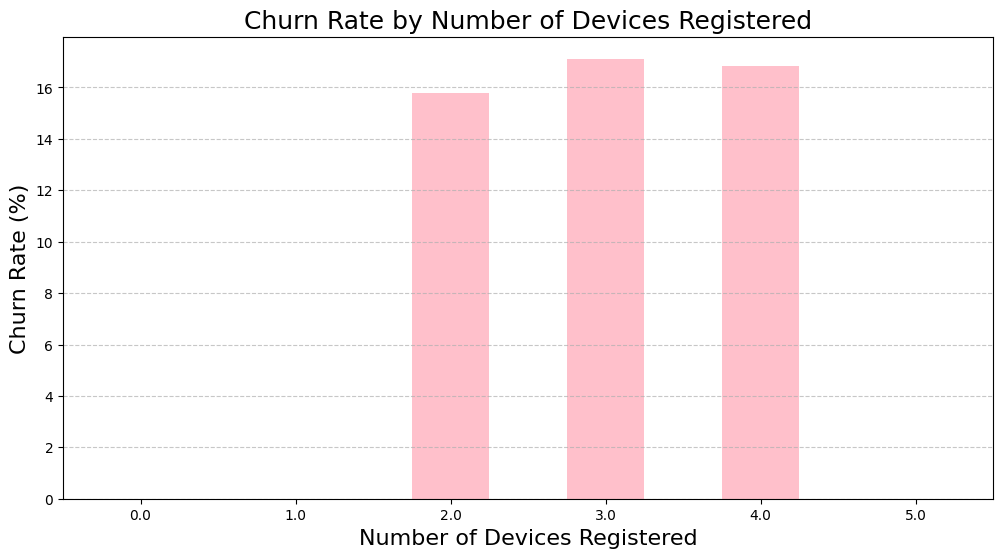

In [83]:
device_churn_rate= EC.groupby('NumberOfDeviceRegistered')['Churn'].mean()*100

# creating a plot to visualize the relationship
plt.figure(figsize=(12,6))
hours_churn_rate.plot(kind='bar',color='pink')
plt.title('Churn Rate by Number of Devices Registered', size=18)
plt.xlabel('Number of Devices Registered',size=16)
plt.ylabel('Churn Rate (%)',size=16)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

* 1 to 2 Devices: Customers with 1 or 2 devices registered have the lowest churn rates, at 9.36% and 9.42% respectively.
* 3 to 4 Devices: There is a noticeable increase in churn rates for customers with 3 or 4 devices, with rates of 14.95% and 16.49%.
* 5 to 6 Devices: The churn rate rises significantly for customers with 5 and 6 devices registered, reaching 22.47% and 34.57%.

# How does marital status impact the likelihood of churn?

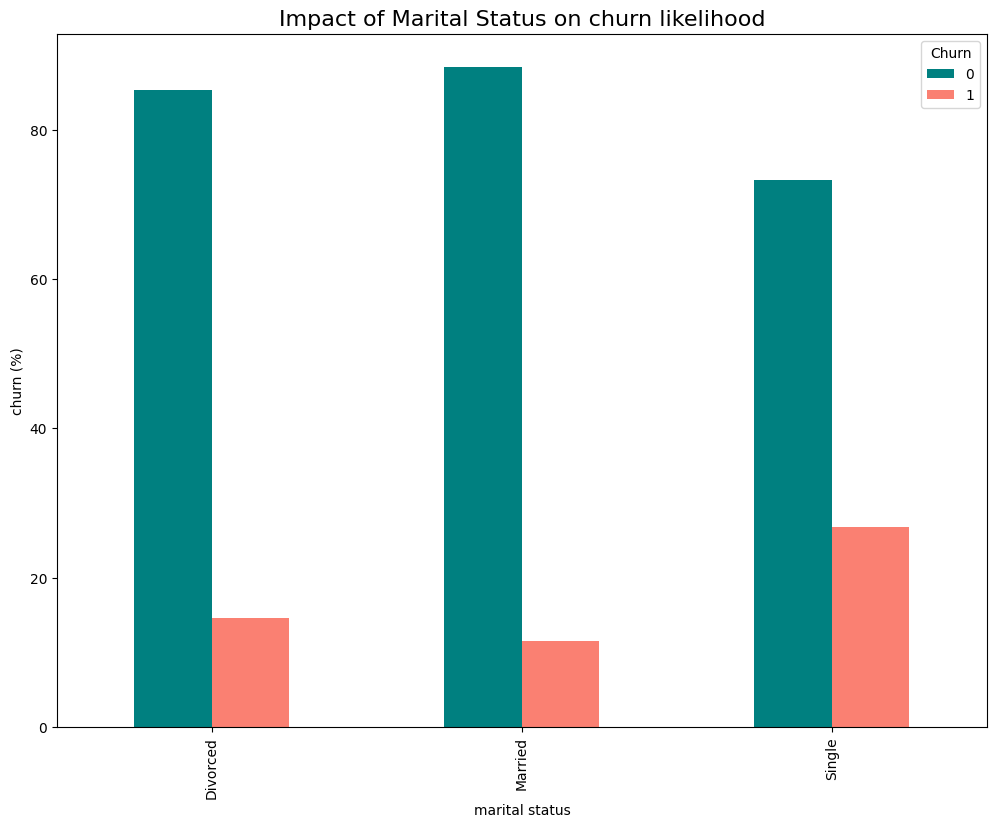

In [84]:
# calculating the churn rate for different marital statuses
marital_status_churn_rate=pd.crosstab(EC['MaritalStatus'],EC['Churn'],normalize='index')*100
marital_status_churn_rate=marital_status_churn_rate.round(2)
# visualize impact of marital status on the likelihood of churn
plt.figure(figsize=(12,9))
marital_status_churn_rate.plot(kind='bar',stacked=False,color=['teal','salmon'],ax=plt.gca())
plt.title('Impact of Marital Status on churn likelihood',size=16)
plt.xlabel('marital status')
plt.ylabel('churn (%)')
plt.show()


* Single customers have a significantly higher churn rate (26.73%) compared to married (11.52%) and divorced (14.62%) customers.
* Married customers exhibit the highest retention rate (88.48%).

This suggests that marital status is a relevant factor in customer churn, with different marital statuses showing distinct churn behaviors.



# Is there a significant difference in satisfcation scores between customers who churn and those who don't ?


In [85]:
# Analysing the difference in satisfaction scores between customers who churn and those who don't
satisfaction_churn_comparison=EC.groupby('Churn')['SatisfactionScore'].mean()
satisfaction_churn_comparison=satisfaction_churn_comparison.round(2)
#conducting a t-test to determine if the difference is statistically significant 
from scipy.stats import ttest_ind

#separating the data into two group : churned and not churned
satisfaction_churned=EC[EC['Churn']==1]['SatisfactionScore']
satisfaction_not_churned=EC[EC['Churn']==0]['SatisfactionScore']

# performing the t-test
t_stat,p_value=ttest_ind(satisfaction_churned,satisfaction_not_churned)
satisfaction_churn_comparison,p_value

(Churn
 0    3.00
 1    3.39
 Name: SatisfactionScore, dtype: float64,
 2.105157407388599e-15)

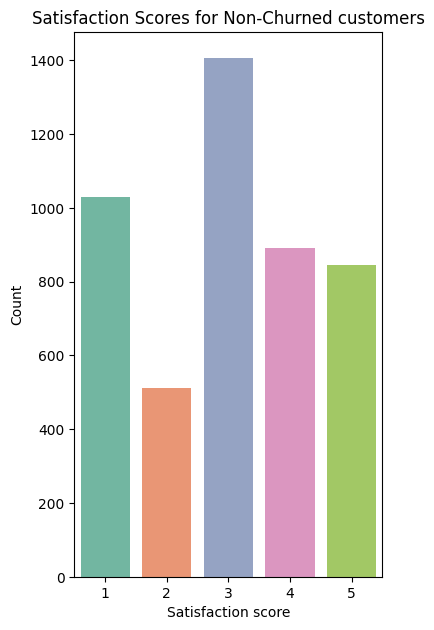

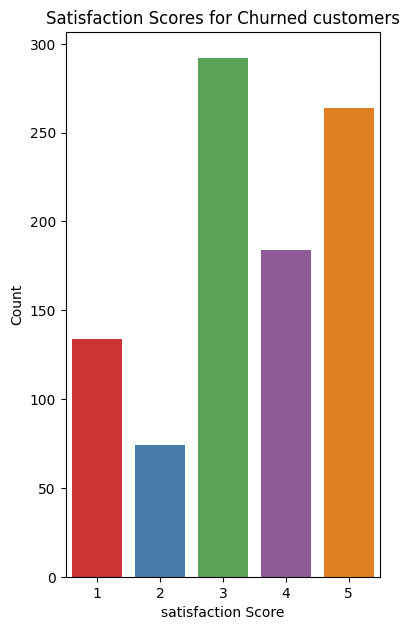

In [86]:
plt.figure(figsize=(15,12))
#plot for customer who did not churn
plt.subplot(2,4,2)
sns.countplot(x='SatisfactionScore',data=EC[EC['Churn']==0],palette='Set2')
plt.title('Satisfaction Scores for Non-Churned customers')
plt.xlabel('Satisfaction score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# plot for customer who churned
plt.figure(figsize=(15,12))
plt.subplot (2,4,2)
sns.countplot(x='SatisfactionScore',data=EC[EC['Churn']==1],palette='Set1')
plt.title('Satisfaction Scores for Churned customers')
plt.xlabel('satisfaction Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


* Customers who did not churn (Churn = 0): The average satisfaction score is 3.00.
* Customers who churned (Churn = 1): The average satisfaction score is 3.39.
* Statistical Significance: The t-test for the difference in satisfaction scores between the two groups yields a p-value of approximately 2.11×10−152.11×10−15, which is significantly less than the conventional threshold of 0.05.

These results indicate that there is a statistically significant difference in the satisfaction scores between customers who churn and those who don’t. Surprisingly, the average satisfaction score is higher for customers who churned compared to those who didn’t. This might suggest that factors other than satisfaction scores are influencing the decision to churn, or that the satisfaction scores may not fully capture the customer’s experience or likelihood to remain with the service.



# Do Customer s who complain have a higher churn rate?


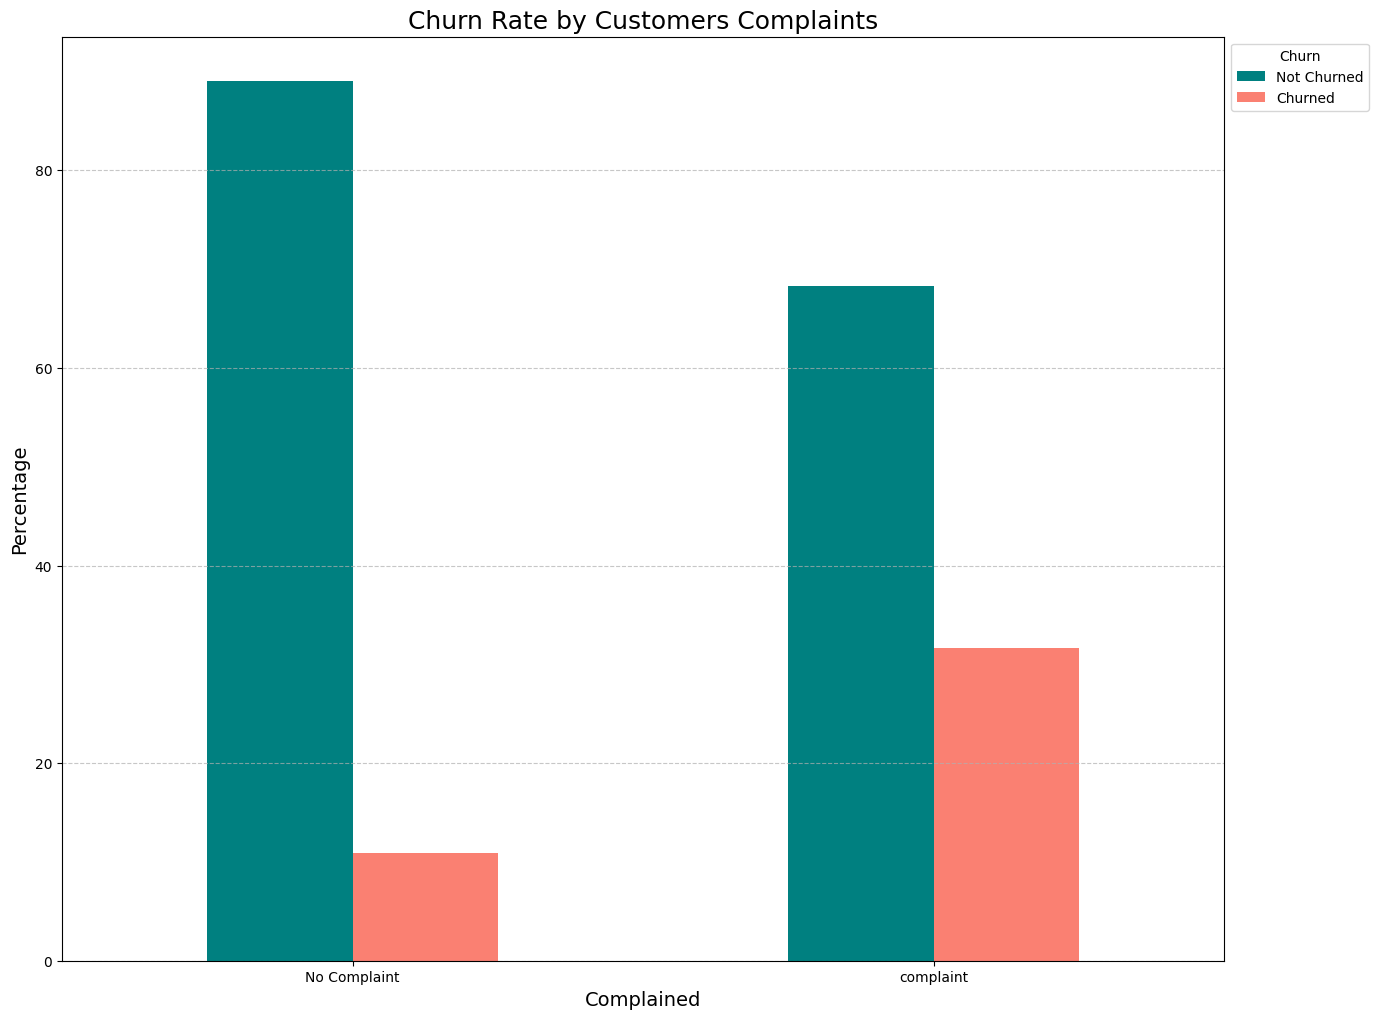

In [87]:
# Analysing the relationship between customers complain and churn rate
complaint_churn_rate=pd.crosstab(EC['Complain'],EC['Churn'],normalize='index')*100
complaint_churn_rate=complaint_churn_rate.round(2)

# Creating a bar plot to visualize the relationship
plt.figure(figsize=(15,12))
complaint_churn_rate.plot(kind='bar',stacked=False,color=['teal','salmon'],ax=plt.gca())
plt.title('Churn Rate by Customers Complaints',size=18)
plt.xlabel('Complained',size=14)
plt.ylabel('Percentage',size=14)
plt.xticks(ticks=[0,1],labels=['No Complaint','complaint'],rotation=0)
plt.legend(title='Churn', labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

* Customers who have lodged complaints have a significantly higher churn rate (31.67%) compared to those who have not complained (10.93%).
* This suggests that customer complaints are a strong indicator of churn risk and highlight the importance of addressing customer issues effectively to improve retention.

# Is there relationship between the frequency of coupon usage and churn rate?


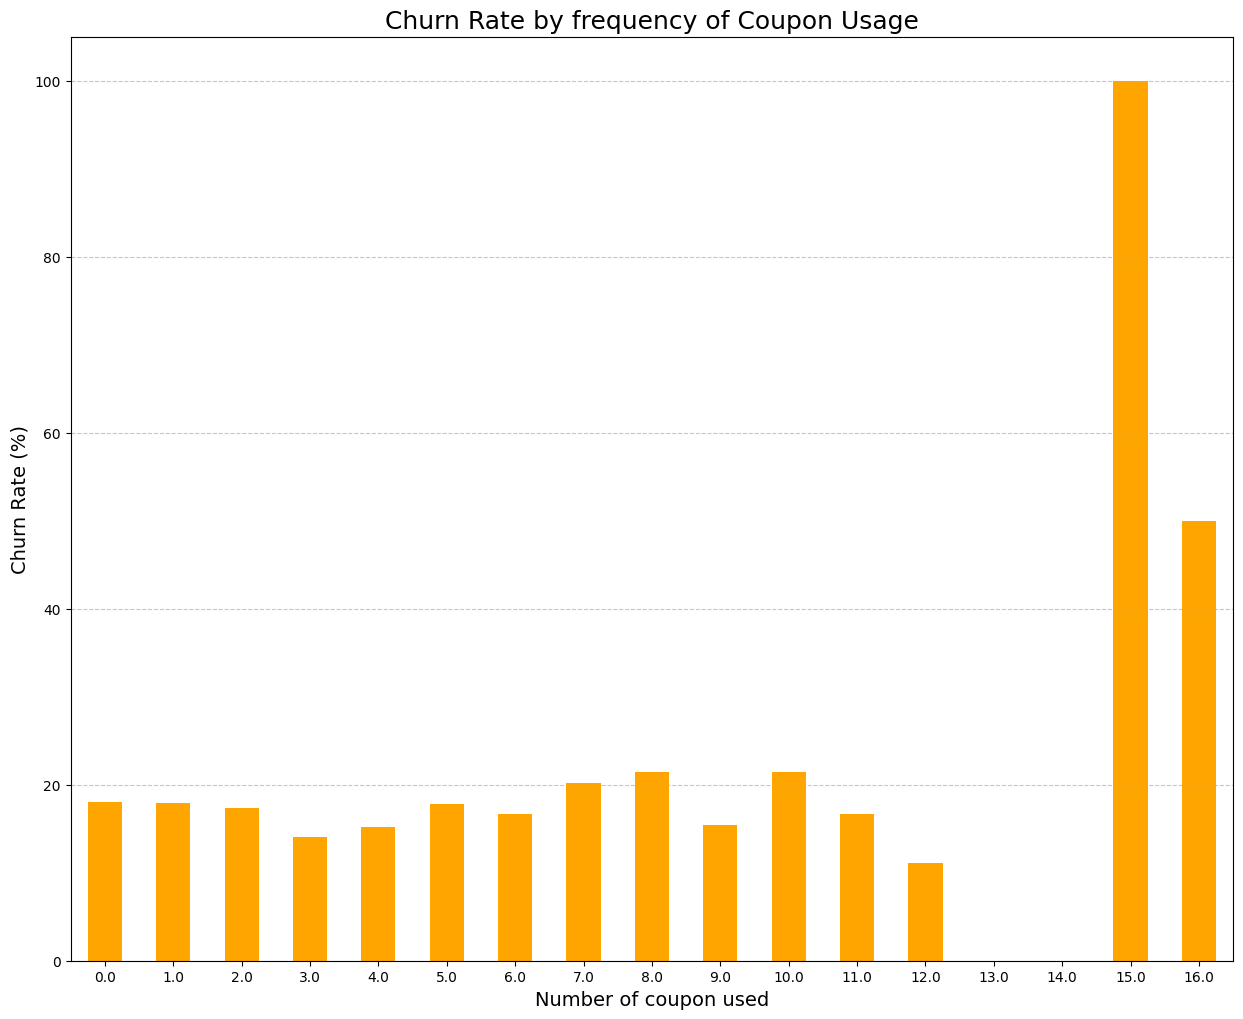

In [88]:
# grouping data by Coupon Used and calculating the churn rate for each group
coupon_churn_rate=EC.groupby('CouponUsed')['Churn'].mean()*100
coupon_churn_rate=coupon_churn_rate.round(2)
coupon_churn_rate
# creating a plot for visualize the relationship
plt.figure(figsize=(15,12))
coupon_churn_rate.plot(kind='bar',color='orange')
plt.title('Churn Rate by frequency of Coupon Usage',size=18)
plt.xlabel('Number of coupon used',size=14)
plt.ylabel('Churn Rate (%)',size=14)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()



* The churn rate varies with the number of coupons used, showing a non-linear relationship.
* Customers who used 0 to 2 coupons show churn rates fluctuating between approximately 16% and 18%.
* A notable decrease in churn rate is observed for customers who used 3 to 4 coupons, with rates around 14% to 15%.
* the churn rate increases again for customers using 5 to 8 coupons, reaching over 20% in some cases.
* Interestingly, for 12 to 14 coupons, the churn rate drops significantly, even to 0% for 13 and 14 coupons, which could be due to a small sample size in these categories.
* An exceptionally high churn rate (100%) is observed for customers who used 15 coupons, which might indicate an anomaly or a very small sample size for this group.

These observations suggest that while there is a relationship between coupon usage and churn, it is not straightforward. The churn rate does not consistently increase or decrease with the frequency of coupon usage, indicating that other factors might also play a significant role in determining churn.

# Does the duration since a customer last order predict churn ?


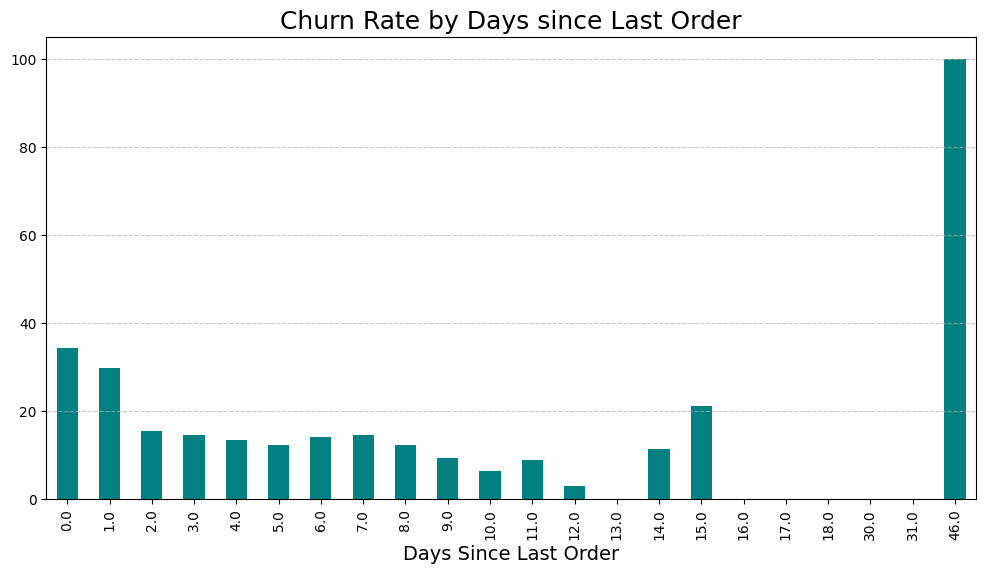

In [89]:
# Analyzing the relationship between the duration since a customer's last order and churn
# grouping data by 'DaySincelastOrder' and calculating the churn rate for each group
last_order_churn_rate=EC.groupby('DaySinceLastOrder')['Churn'].mean()* 100
last_order_churn_rate=last_order_churn_rate.round(2)
last_order_churn_rate

# creating a plot to visualize the relationship
plt.figure(figsize=(12,6))
last_order_churn_rate.plot(kind='bar',color='teal')
plt.title('Churn Rate by Days since Last Order',size=18)
plt.xlabel('Days Since Last Order',size=14)
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


* There is notable variation in churn rate based on the duration since the  last order.
* High Churn Rates for Short durations: A significantly high churn rate is observed for customers who have just recently made an order (0 and 1 day ago) with rates of 34.27% and 29.64% respectively.
* Deceasing trend: the churn rate generally decrease as the duration since the last order increase reaching lower rates for durations of 4 to 10 days.
* variablity in longer durations: for durations longer than 10 days the churn rate shows variability with some days experiencing very low or zero churn rates. this couldd be influenced by a smaller sample size for these categories.
* anomaly at 46 days: A 100% churn rate is observed at 46 days since the last order which likely indicates an anomaly or very small number of customers in the category.

These observations suggest that the duration since a customer's last order can be predict of churn particularly in the immediate days following an order. the trend indicates that customers are more likely to churn shortly after placing an order with the likelihood decreasing as more time passes.
the insight can inform strategies for engaging customers at critical times to reduce the likelihood of churn.



# Are certain product categoris(prefered order cat) more prone leading to churn? 

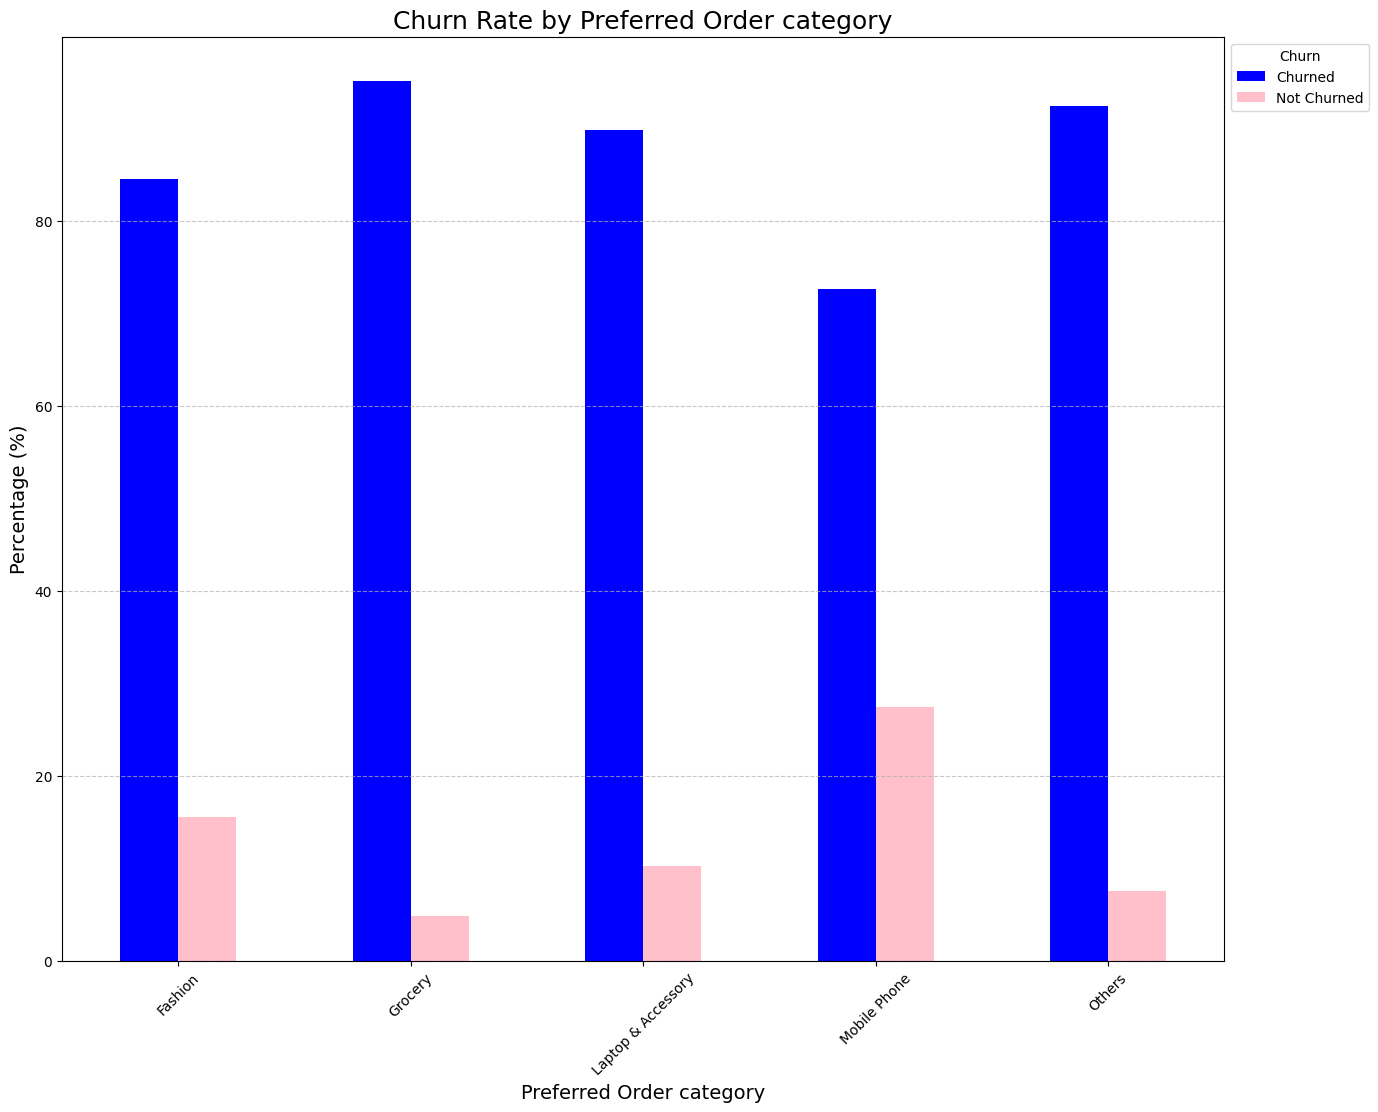

In [90]:
# Analysing the relationship between product category and churn
# group data by preferred order cat and calculating the churn rate for each category
category_churn_rate=pd.crosstab(EC['PreferedOrderCat'],EC['Churn'],normalize='index') *100
category_churn_rate=category_churn_rate.round(2)
category_churn_rate

# create a bar plot to visualize the relationship
plt.figure(figsize=(15,12))
category_churn_rate.plot(kind='bar',stacked=False, color=['blue','pink'],ax=plt.gca())
plt.title('Churn Rate by Preferred Order category',size=18)
plt.xlabel('Preferred Order category',size=14)
plt.ylabel('Percentage (%)',size=14)
plt.xticks(rotation=45)
plt.legend(title='Churn',labels=['Churned','Not Churned'], loc='upper left',bbox_to_anchor=(1,1))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

* Customers who prefer ordering Mobile Phones have the highest churn rate (27.40%), which is significantly higher compared to other categories.
* The Grocery category shows the lowest churn rate (4.88%), suggesting high customer retention in this category.

# How do various cashback amounts influence churn behavior?


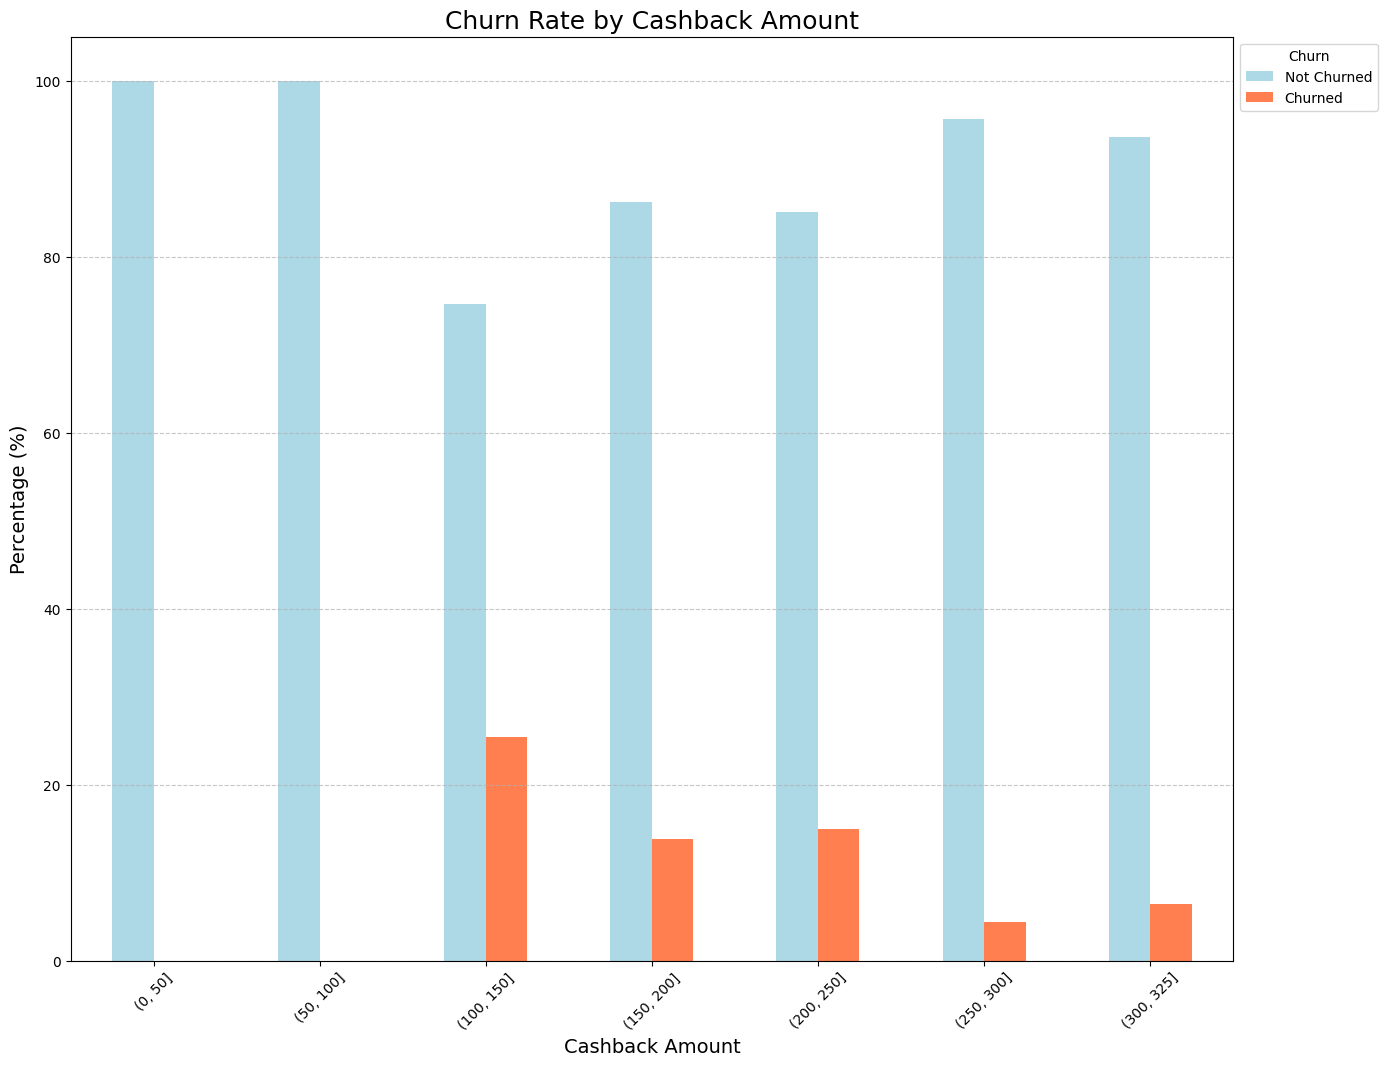

In [91]:
# since cashback amount is a continuous variable we will create a bins to  categorize the data for analysis
EC['CashbackAmountBin']=pd.cut(EC['CashbackAmount'],bins=[0,50,100,150,200,250,300,EC['CashbackAmount'].max()])
# grouping data by these amount bins and calculating the churn rate for each bin
cashback_churn_rate=pd.crosstab(EC['CashbackAmountBin'],EC['Churn'],normalize='index')*100
cashback_churn_rate=cashback_churn_rate.round(2)
cashback_churn_rate
# creating a bar plot to visualize the relationship 
plt.figure(figsize=(15,12))
cashback_churn_rate.plot(kind='bar',stacked=False, color=['LightBlue','coral'],ax=plt.gca())
plt.title('Churn Rate by Cashback Amount',size=18)
plt.xlabel('Cashback Amount',size=14)
plt.ylabel('Percentage (%)',size=14)
plt.xticks(rotation=45)
plt.legend(title='Churn',labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


These results suggest that there is a relationship between cashback amounts and churn behavior, with different churn rates associated with different cashback amount ranges. The increase in churn rate for cashback amounts between $100 and $150 is particularly notable. Higher cashback amounts (above $300) are associated with lower churn rates, indicating that more generous cashback offers might contribute to higher customer retention.



# Our analysis by exploring how a combination of various features impacts customer churn.



# How does the combination of gender and marital status affect churn rates?


In [92]:
#Creating a crosstab to analyze churn rate by the combination of gender and marital status
gender_marital_status_churn=pd.crosstab(index=[EC['Gender'],EC['MaritalStatus']],columns=EC['Churn'],normalize='index')*100
gender_marital_status_churn=gender_marital_status_churn.round(2)
gender_marital_status_churn


Churn                     0      1
Gender MaritalStatus              
Female Divorced       86.21  13.79
       Married        90.18   9.82
       Single         75.20  24.80
Male   Divorced       84.80  15.20
       Married        87.43  12.57
       Single         71.87  28.13

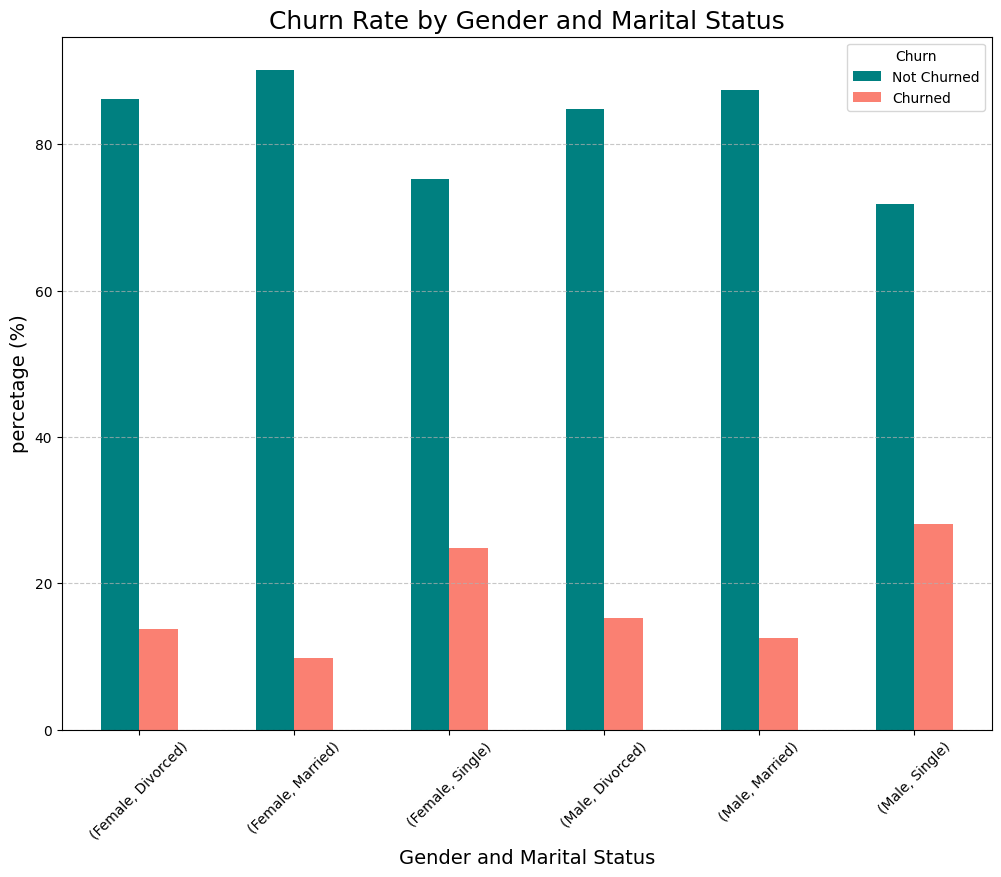

In [93]:
#creating a stacked bar plot to visualize this relationship
gender_marital_status_churn.plot(kind='bar',stacked=False,color=['teal','salmon'],figsize=(12,9))
plt.title('Churn Rate by Gender and Marital Status',size=18)
plt.xlabel('Gender and Marital Status',size=14)
plt.ylabel('percetage (%)',size=14)
plt.xticks(rotation=45)
plt.legend(title='Churn',labels=['Not Churned','Churned'])
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

* Married female customers have the highest retention rate (90.18%) and the lowest churn rate (9.82%).
* Single male customers exhibit the highest churn rate (28.13%) among all groups.
* single customers (both male and female) have higher churn rates compared to married and divorced customers.
* There is a noticeable difference in churn rates between genders within the same marital status category, particularly among single customers.

# Are there patterns of churn when considering both the number of hours spent on the app and the satisfaction score?


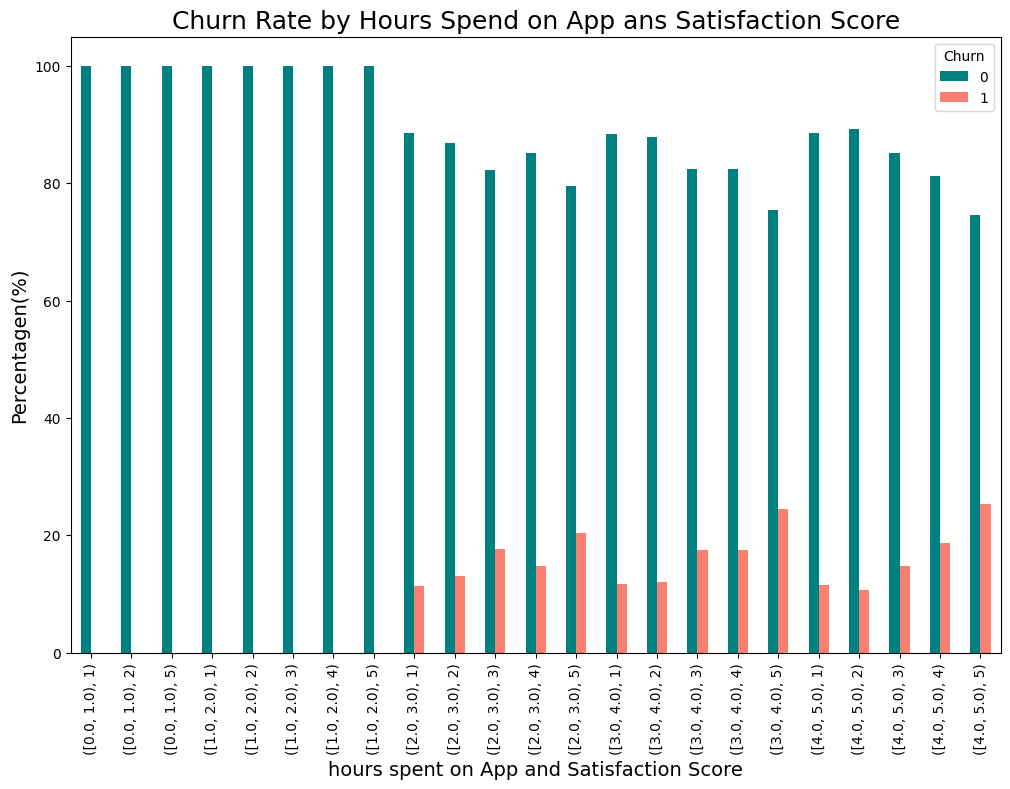

In [94]:
#creating bins for hours spent on the app for easier analysis
EC['HourSpendOnAppBin']=pd.cut(EC['HourSpendOnApp'],bins=[0,1,2,3,4,EC['HourSpendOnApp'].max()],include_lowest=True,right=False)

# creating a crosstab to analyze churn rate by the combination of hours spent on the app and satisfaction score
hours_statisfaction_churn=pd.crosstab(index=[EC['HourSpendOnAppBin'],EC['SatisfactionScore']],columns=EC['Churn'],normalize='index')*100
hours_statisfaction_churn=hours_statisfaction_churn.round(2)
hours_statisfaction_churn

#creating a visualization for this relationship

hours_statisfaction_churn.plot(kind='bar',stacked=False,figsize=(12,8),color=['teal','salmon'])
plt.title('Churn Rate by Hours Spend on App ans Satisfaction Score',size=18)
plt.xlabel('hours spent on App and Satisfaction Score',size=14)
plt.ylabel('Percentagen(%)',size=14)
plt.xticks(rotation=90)
plt.show()

* Each bar rpresents by specific combinations such as 0-1 hours & satisfaction score 1 or 3-4 hours & satisfaction score 5.
* it is clear that people who spent more than hour  and irrespective of satisfaction score observe churning.

# Does the prefeered payment mode combined with the number of devices registered impact and churn differtly?

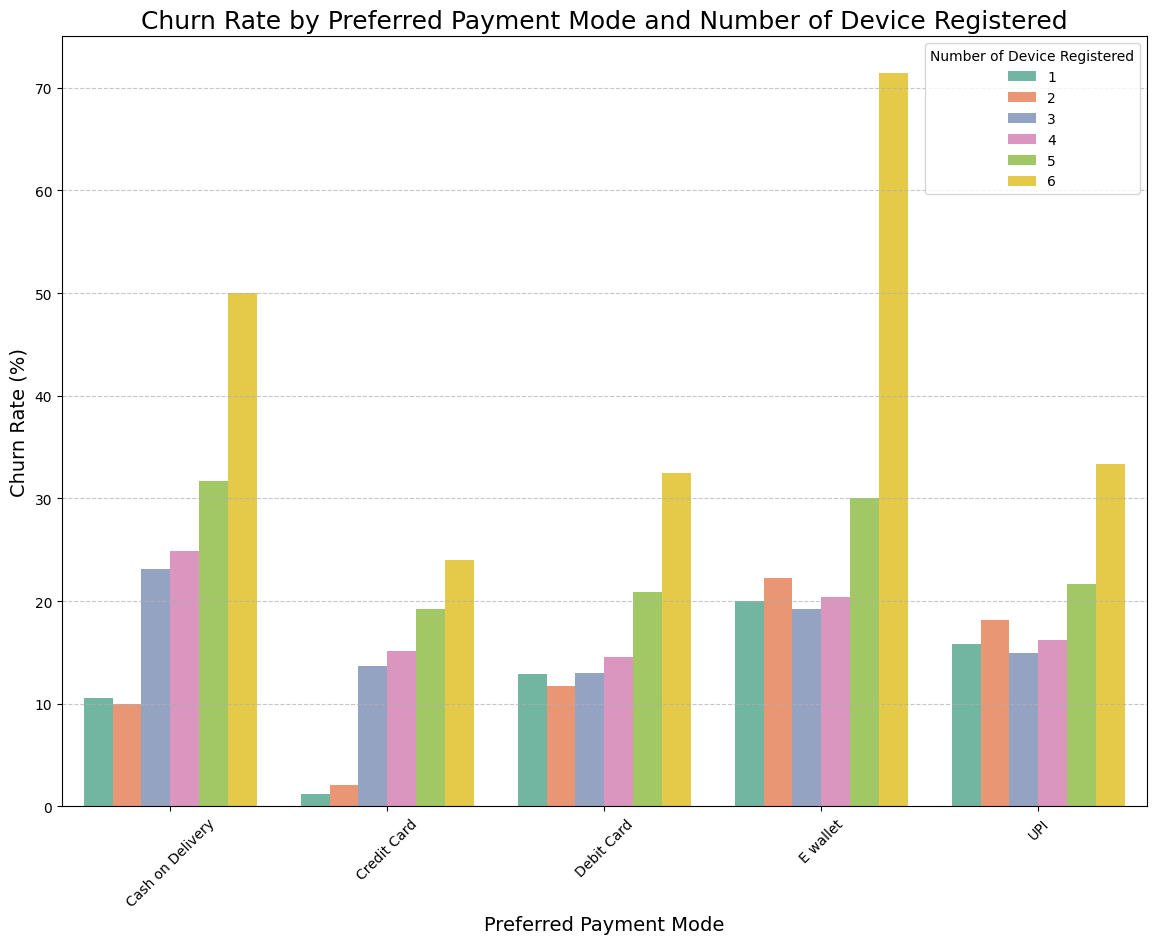

In [95]:
# creating a crosstab to analyze churn rate by the calculating of preferred payment mode and number of device registered
payment_mode_device_churn=pd.crosstab(index=[EC['PreferredPaymentMode'],EC['NumberOfDeviceRegistered']],columns=EC['Churn'],normalize='index')*100
payment_mode_device_churn=payment_mode_device_churn.round(2)
payment_mode_device_churn

# creating a visualization for this relationship
plt.figure(figsize=(14,10))
sns.barplot(x='PreferredPaymentMode',y=1,hue='NumberOfDeviceRegistered',data=payment_mode_device_churn.reset_index(),
           palette='Set2')
plt.title('Churn Rate by Preferred Payment Mode and Number of Device Registered',size=18)
plt.xlabel('Preferred Payment Mode',size=14)
plt.ylabel('Churn Rate (%)',size=14)
plt.xticks(rotation=45)
plt.legend(title='Number of Device Registered')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

* Customer using the E wallet Payment method with 6 devices registered have the highest churn rate across all combinations.
* the next highest churn rate is observed for customers using cash on delivery with 6 device registered.
* the lowest churn rate is found amouing customers using a credit card ith only 1 device registered.


# Does the duration since the last order and the number of complaints lodged have a combined effect on churn?


In [96]:
# Grouping data by DaySinceLastOrder and Complain and calculating the churn rate for each group
duration_complaints_churn=pd.crosstab(index=[EC['DaySinceLastOrder'],EC['Complain']],columns=EC['Churn'],normalize='index')*100
duration_complaints_churn=duration_complaints_churn.round(2)
duration_complaints_churn


Churn                            0       1
DaySinceLastOrder Complain                
0.0               0          75.29   24.71
                  1          44.87   55.13
1.0               0          78.97   21.03
                  1          50.54   49.46
2.0               0          91.38    8.62
                  1          68.51   31.49
3.0               0          91.22    8.78
                  1          71.76   28.24
4.0               0          91.56    8.44
                  1          73.98   26.02
5.0               0          92.26    7.74
                  1          78.08   21.92
6.0               0          87.65   12.35
                  1          81.25   18.75
7.0               0          92.31    7.69
                  1          67.21   32.79
8.0               0          93.47    6.53
                  1          71.43   28.57
9.0               0          93.10    6.90
                  1          82.09   17.91
10.0              0          94.74    5.26
                  1          90.70    9.30
11.0              0          93.85    6.15
                  1          84.62   15.38
12.0              0         100.00    0.00
                  1          91.67    8.33
13.0              0         100.00    0.00
                  1         100.00    0.00
14.0              0          92.59    7.41
                  1          75.00   25.00
15.0              0          86.67   13.33
                  1          50.00   50.00
16.0              0         100.00    0.00
                  1         100.00    0.00
17.0              0         100.00    0.00
                  1         100.00    0.00
18.0              0         100.00    0.00
                  1         100.00    0.00
30.0              0         100.00    0.00
31.0              0         100.00    0.00
46.0              0           0.00  100.00

* immediate post order period: On the same day as the last order(day 0),customer who have lodged a complaint show a significant higher churn rate (55.13 %) compared to those who have not complained (24.71 %).

* day following the order: In the days following an order (Day 1 to day 18) the churn rate for customers with complaints generally remains higher than for those without complaints.the difference is particularly notable in the first few days after the order.

* Extended Periods without order: for longer duration without orders (30 days and beyond) the churn rate drops to 0 % for customers without complaints interestingly a 100% churn rate is observed at 46 days since the last order but this could be due to very small sample size for this category.

* No complaints with Zero Churn: there are instance where the churn rate is 0% for customers without complaints (days 12,13,17,18,30 and 31).this suggests strong retention in these groups.

* High Churn at extended durations with complaints: for some extended duration (days15) the churn rate for customers with complaints is notable high (50.00 %).

* these finding indicate that the combination of recent interaction (last order) and customer disatisfaction (complaints) has a significant impact on churn.immediate post order periods combined with customer complaints are critical windows where churn risk is heightened highlighting the importance of prompt and effective complaint resolution and customer engagement strategies.

# How does the type of preferred order category combined with cashback amount influence churn?

In [97]:
# Creating bins for cashback amounts for easier analysis
EC['CashbackAmountBin']=pd.cut(EC['CashbackAmount'],bins=[0,15,100,150,200,250,300,EC['CashbackAmount'].max()],include_lowest=True,right=False)

# creating a crosstab to analyze churn rate by the combination of preferred order category and cashback amount bin
order_cat_cashback_churn=pd.crosstab (index=[EC['PreferedOrderCat'],EC['CashbackAmountBin']],columns=EC['Churn'],normalize='index')*100
order_cat_cashback_churn=order_cat_cashback_churn.round(2)
order_cat_cashback_churn


Churn                                      0      1
PreferedOrderCat   CashbackAmountBin               
Fashion            [100, 150)         100.00   0.00
                   [150, 200)          83.54  16.46
                   [200, 250)          84.16  15.84
                   [250, 300)          94.87   5.13
Grocery            [0, 15)            100.00   0.00
                   [15, 100)          100.00   0.00
                   [200, 250)          86.81  13.19
                   [250, 300)          97.25   2.75
                   [300, 325)         100.00   0.00
Laptop & Accessory [0, 15)            100.00   0.00
                   [15, 100)          100.00   0.00
                   [100, 150)          89.65  10.35
                   [150, 200)          89.93  10.07
                   [200, 250)          86.52  13.48
Mobile Phone       [0, 15)            100.00   0.00
                   [15, 100)          100.00   0.00
                   [100, 150)          69.89  30.11
                   [150, 200)          78.34  21.66
Others             [250, 300)          92.19   7.81
                   [300, 325)          92.42   7.58

* the combined effect of the preferred order category and cashback amount on churn provides point.

# Fashion Category:

* Customers receiving cashback between $100 and $150 have a 0% churn rate.
* Churn rates increase slightly with higher cashback amounts reaching 16.47% for the $150 to $200 range.

# Grocery Category:

* Churn is nonexistent (0%) for cashback amounts below $50 and above $300.
* Moderate churn rates are observed for cashback amounts between $200 and $250 (13.19%).

# Laptop & Accessory Category:

* No churn for cashback amounts below $50.
* Churn rates range from 10.46% to 14.81% for higher cashback amounts.

# Mobile Phone Category:

* Churn rate is 0% for cashback amounts below $100.
* A notable increase in churn rate is observed for cashback amounts between $100 and $150 (30.10%).

# Others Category:

* Churn rates are relatively low, around 7.58% to 7.69% for cashback amounts between $250 and $325.

These figures indicate that the churn rate varies significantly across different combinations of preferred order categories and cashback amount bins. In some categories, such as Mobile Phones, higher cashback amounts correlate with higher churn rates, while in others, such as Fashion and Grocery, the pattern is less clear. This suggests that the impact of cashback on churn may depend on the type of products customers are purchasing, and different strategies might be needed for different categories to optimize customer retention

# Does the combination of customer tenure and satisfaction score lead to varying churn rates?


In [98]:
# Creating bins for tenure for eaiser analysis
EC['TenureBin']=pd.cut(EC['Tenure'],bins=[0,1,2,3,4,5,EC['Tenure'].max()],include_lowest=True,right=False)
# creating a crosstab to analyze churn rate by the combination of tenure and satisfaction score
tenure_satisfaction_churn=pd.crosstab(index=[EC['TenureBin'],EC['SatisfactionScore']], columns=EC['Churn'],normalize='index')*100
tenure_satisfaction_churn=tenure_satisfaction_churn.round(2)
tenure_satisfaction_churn                 

Churn                              0      1
TenureBin   SatisfactionScore              
[0.0, 1.0)  1                  56.84  43.16
            2                  55.77  44.23
            3                  46.84  53.16
            4                  43.84  56.16
            5                  36.15  63.85
[1.0, 2.0)  1                  59.84  40.16
            2                  60.94  39.06
            3                  47.78  52.22
            4                  48.84  51.16
            5                  40.12  59.88
[2.0, 3.0)  1                  96.97   3.03
            2                  95.83   4.17
            3                  95.35   4.65
            4                  93.33   6.67
            5                  78.38  21.62
[3.0, 4.0)  1                  94.74   5.26
            2                  92.86   7.14
            3                  92.98   7.02
            4                  87.50  12.50
            5                  85.00  15.00
[4.0, 5.0)  1                  95.45   4.55
            2                  91.67   8.33
            3                  93.65   6.35
            4                  72.41  27.59
            5                  90.70   9.30
[5.0, 61.0) 1                  96.21   3.79
            2                  95.19   4.81
            3                  93.54   6.46
            4                  94.38   5.62
            5                  94.38   5.62

the combined effect of customer tenure (categorized into bins) and satisfaction score on churn rates reveals.

# Shorter Tenure (0–2 years):

* Churn rates are notably higher across all satisfaction scores, with the highest churn observed in customers with a satisfaction score of 5 (63.85% churn).

# Moderate Tenure ( 2–3 years):

* A marked decrease in churn rates is observed, especially in the 2–3 years tenure bin. Churn rates are particularly low for all satisfaction scores in this tenure range.

# Longer Tenure (3–5 years and beyond):

* Churn rates continue to be lower, indicating strong retention among these customers.
* Satisfaction scores have varying effects on churn, but overall, churn rates remain relatively low compared to shorter tenures.

#  Overall Trends:

* Generally, higher tenure correlates with lower churn rates across all satisfaction scores.
* In shorter tenure bins, customer satisfaction appears to have a more pronounced impact on churn, with higher satisfaction scores correlating with higher churn.


These insights suggest that tenure plays a significant role in customer retention, with longer-tenured customers exhibiting lower churn rates regardless of their satisfaction score. However, for customers with shorter tenure, satisfaction levels are more influential in determining churn, highlighting the importance of early customer satisfaction and engagement strategies.

# What is the churn ratio for combinations of Gender, CityTier, and MaritalStatus?


In [99]:
# calculating the churn ratio for combinations of gender , citytier and marital status
gender_citytier_marital_grouped=EC.groupby(['Gender','CityTier','MaritalStatus'])

#total customer in each group 
total_customers=gender_citytier_marital_grouped.size().reset_index(name='Total customers')

#total churn numbers in each group(where churn=1 indicates churned customers)
churn_numbers=gender_citytier_marital_grouped['Churn'].sum().reset_index(name='Churn Numbers')
# total churn customers and churn numbrers
merged_data=total_customers.merge(churn_numbers,on=['Gender','CityTier','MaritalStatus'])
#calculating the churn ratio
merged_data['Churn Ratio']=merged_data['Churn Numbers']/ merged_data['Total customers']

#calculating not churn numbers (total-churn)
merged_data['Not Churn Number']=merged_data['Total customers']-merged_data['Churn Numbers']
merged_data

,Gender,CityTier,MaritalStatus,Total customers,Churn Numbers,Churn Ratio,Not Churn Number
0,Female,1,Divorced,216,30,0.138889,186
1,Female,1,Married,738,58,0.078591,680
2,Female,1,Single,488,84,0.172131,404
3,Female,2,Divorced,8,2,0.250000,6
4,Female,2,Married,48,22,0.458333,26
5,Female,2,Single,18,0,0.000000,18
6,Female,3,Divorced,124,16,0.129032,108
7,Female,3,Married,354,32,0.090395,322
8,Female,3,Single,252,104,0.412698,148
9,Male,1,Divorced,324,48,0.148148,276


# Gender Variations:

* The churn ratios differ between male and female customers across different city tiers and marital statuses. This suggests that gender may play a role in customer churn.

# Impact of CityTier:

* The churn ratio varies significantly across different city tiers. For instance, females in CityTier 2 who are married have a much higher churn ratio (45.83%) compared to those in CityTier 1 (7.86%). This could indicate that the location (or city tier) has a significant impact on customer churn.

# Marital Status Influence:

* Marital status also seems to affect churn. Single females in CityTier 3 show a particularly high churn ratio (41.27%), whereas married females in the same city tier have a much lower ratio (9.04%). This pattern suggests that marital status combined with city tier can be a strong indicator of churn.

# Comparing Genders:

* When comparing genders, in some cases, males have higher churn ratios than females in the same category. For example, single males in CityTier 1 have a churn ratio of 26.87%, which is higher than that of single females in the same city tier (17.21%).

# Lowest and Highest Churn Groups:

The lowest churn ratios are observed in groups like females in CityTier 2 who are single (0.0%) and males in CityTier 2 who are divorced (7.69%). On the other hand, the highest churn ratios are seen in groups like females in CityTier 2 who are married (45.83%) and single males in CityTier 3 (32.14%).

# Absolute Numbers vs. Ratios:

It’s important to consider both the churn ratios and the absolute numbers. For instance, while single females in CityTier 3 have a high churn ratio, the absolute number of churned customers (104) might not be as high as in other groups with lower churn ratios but higher customer bases, like married males in CityTier 1 (132 churned out of 1230).

These insights can be crucial for developing targeted strategies to reduce churn. For instance, specific marketing campaigns or customer engagement strategies could be designed for high-risk groups such as single females in higher city tiers or single males in CityTier 1.

# What is the churn ratio for combinations of Gender, PreferredLoginDevice and Number of Device Registered?


In [100]:
# calculating the churn ratio for combinations of gender, preferredLoginDevice and Number of Device Registered
gender_login_device_number_grouped=EC.groupby(['Gender','PreferredLoginDevice','NumberOfDeviceRegistered'])

#total customers in each group
total_customers=gender_login_device_number_grouped.size().reset_index(name='Total Customers')

#total churn numbers in each group
churn_numbers=gender_login_device_number_grouped['Churn'].sum().reset_index(name='Churn Numbers')

# merging the total customers and churn numbers
merged_data=total_customers.merge(churn_numbers,on=['Gender','PreferredLoginDevice','NumberOfDeviceRegistered'])

# calculating the churn ratio

merged_data['Churn Ratio']=merged_data['Churn Numbers']/merged_data['Total Customers']

merged_data

,Gender,PreferredLoginDevice,NumberOfDeviceRegistered,Total Customers,Churn Numbers,Churn Ratio
0,Female,Computer,1,25,8,0.320000
1,Female,Computer,2,28,8,0.285714
2,Female,Computer,3,197,28,0.142132
3,Female,Computer,4,271,50,0.184502
4,Female,Computer,5,94,30,0.319149
5,Female,Computer,6,17,8,0.470588
6,Female,Mobile Phone,1,60,3,0.050000
7,Female,Mobile Phone,2,70,4,0.057143
8,Female,Mobile Phone,3,476,65,0.136555
9,Female,Mobile Phone,4,693,88,0.126984


# Comparing Gender Across Similar Categories:

* When comparing genders with the same preferred login device and number of devices registered, there are noticeable differences. 
  For example males with 5 devices registered using mobile phones have a higher churn ratio (25.57%) compared to females in the same category (14.76%).

# Lowest and Highest Churn Ratios:

* The lowest churn ratios are observed in groups like females using mobile phones with 1 device registered (5%) and males using mobile phones with 2 devices registered (4.51%). The highest churn ratios are seen in groups like females using computers with 6 devices registered (47.06%) and males using mobile phones with 6 devices (33.90%).

# Device Registration as a Churn Indicator:

* The number of devices registered appears to be a significant indicator of churn, especially when combined with the preferred login device. Customers with a higher number of registered devices particularly those using computers show increased churn ratios.

As we conclude this on analyzing customer churn in an e-commerce dataset.

# Role of Demographics and Preferences:

* Our analysis highlights the significant influence of demographics (gender, marital status, city tier) and customer preferences (login device, number of devices registered) on churn rates. Tailoring marketing and customer service strategies to these factors can help in more effectively addressing customer needs.

# Targeted Interventions for High-Risk Groups:

* Identifying high-risk groups, such as single females in higher city tiers or customers using multiple devices allows for targeted interventions. Customized engagement strategies loyalty programs, and personalized communication could be more effective for these segments.

# Enhancing Digital Experience:

* The preference for login devices and the number of devices registered indicate the importance of a seamless digital experience. Improvements in website and app usability especially for customers using multiple devices could reduce churn.

# Importance of Continuous Monitoring:

* Churn analysis is not a one-time activity. Continuous monitoring of customer behavior and preferences along with regular updates to the analysis will help in staying ahead of changing trends and addressing emerging issues promptly.

# Leveraging Data for Predictive Analytics:

* The insights from this analysis can be further utilized to develop predictive models for churn. These models can help in early identification of at-risk customers allowing proactive measures to retain them.

# Balancing Acquisition and Retention Efforts:

* While acquiring new customers is crucial, this analysis underscores the importance of retaining existing customers. A balanced approach in resource allocation between acquisition and retention could be more cost-effective in the long run.



# Conclusion: 
In summary understanding and addressing the factors that contribute to customer churn is vital for sustaining growth and profitability in e-commerce. By leveraging data-driven insights and focusing on customer-centric strategies, businesses can enhance customer satisfaction, improve retention and ultimately drive success.

In [101]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

pd.set_option('display.max_columns', None)

## Preprocessing and Modeling

In [102]:
# importing required librarys to apply Decision tree classifier algorithem

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [103]:
data = EC

In [104]:
EC.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackAmountBin,HourSpendOnAppBin,TenureBin
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,"[150, 200)","[3.0, 4.0)","[4.0, 5.0)"
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,121,"[100, 150)","[3.0, 4.0)",NaN
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120,"[100, 150)","[2.0, 3.0)",NaN
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,"[100, 150)","[2.0, 3.0)","[0.0, 1.0)"
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,130,"[100, 150)",NaN,"[0.0, 1.0)"


In [114]:
data.dropna(inplace=True)

In [115]:
print(data.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CashbackAmountBin              0
HourSpendOnAppBin              0
TenureBin                      0
dtype: int64


In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['PreferredLoginDevice'] = label_encoder.fit_transform(data['PreferredLoginDevice'])
data['PreferredPaymentMode'] = label_encoder.fit_transform(data['PreferredPaymentMode'])
data['PreferedOrderCat'] = label_encoder.fit_transform(data['PreferedOrderCat'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [117]:
X = data[['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]
y = data['Churn']

In [118]:
print(X[:10],y[:10])

    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      4.0                     1         3              6.0   
3      0.0                     1         3             15.0   
5      0.0                     0         1             22.0   
11    11.0                     1         1              6.0   
12     0.0                     1         1             11.0   
13     0.0                     1         1             15.0   
14     9.0                     1         3             15.0   
17     0.0                     1         3             11.0   
18     0.0                     0         1             13.0   
19    19.0                     1         1             20.0   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                      2       0             3.0                         3   
3                      2       1             2.0                         4   
5                      2       0             3.0                        

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3013, 18)
(3013,)
(754, 18)
(754,)


## Decision Tree Classifier

In [121]:
dtc = DecisionTreeClassifier(random_state=42)

In [122]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [123]:
dtc_pred = dtc.predict(X_test)

In [124]:
metrics.accuracy_score(dtc_pred,y_test)

0.9628647214854111

In [125]:
from sklearn.ensemble import RandomForestClassifier

## random forest model

In [126]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [127]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [128]:
rf_pred = rf.predict(X_test)

In [129]:
metrics.accuracy_score(rf_pred,y_test)

0.9761273209549072

## suportive vector machine model

In [130]:
from sklearn import svm

In [131]:
svm_model = svm.SVC(random_state=42)

In [132]:
svm_model.fit(X_train,y_train)

SVC(random_state=42)

In [133]:
svm_pred = svm_model.predict(X_test)

In [134]:
metrics.accuracy_score(svm_pred,y_test)

0.8554376657824934